<a href="https://colab.research.google.com/github/Uzumaki17/Play-Store-Data-Analysis/blob/main/EDA_on_Play_Store_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Play Store App Review Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name** - Jambay Yeshi


# **Project Summary -**

- The Android operating system is widely recognized as the most popular mobile operating system, boasting 2.5 billion active users. It currently dominates the mobile device market, with approximately 85% of all devices running on Google's Android OS. The Google Play Store serves as the largest and most popular platform for Android applications.

- Given the immense user base and potential of the Play Store, analyzing its app data can offer valuable insights for app developers and businesses. Our project aimed to gather and analyze comprehensive information about apps in the Google Play Store to provide insights into app features and the current state of the Android app market.

- The main objective of our project was to explore and analyze the data to identify key factors that contribute to app engagement and success. We aimed to uncover relationships between various attributes, such as the pricing model (free or paid), user reviews, and app ratings.

- The dataset we utilized contains 10,841 rows and 13 columns, with each row representing an individual app. The columns provide information about the app's category, user reviews, rating, size, and other relevant features. Through our analysis, we aimed to identify patterns and correlations that can guide developers in creating successful apps and capturing the Android market.

# **GitHub Link -**

[https://github.com/Uzumaki17/Play-Store-Data-Analysis](https://)

# **Problem Statement**


- The objective is to analyze the factors that motivate people to download Android apps and understand how these factors are interconnected. We will focus on analyzing the categories, reviews, prices, ratings, and installations of apps. The insights we aim to uncover include:

- Identifying the category with the highest number of installations.
- Determining the top 5 apps with the maximum installations.
- Identifying the top 5 apps with low installation numbers.
- Evaluating the importance of ratings for an application.
- Identifying the top category on the Play Store.
- Analyzing the number of apps based on their pricing (free or paid).

By analyzing these aspects, we can gain valuable insights into user preferences and behaviors related to app installations on the Android platform.

#### **Define Your Business Objective?**

- Gain insights into the Android application market and its categories.
- Analyze the factors that influence the success of Android applications.
- Identify the key factors responsible for app engagement and user satisfaction.
- Study and analyze detailed information about Android applications.
- Determine the most important attributes for a successful application.
- Understand the requirements for an application to achieve top rankings in charts.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [14]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
file_path = ('/content/drive/MyDrive/Project_Data/Play Store Data.csv')
play_store_data = pd.read_csv(file_path)

### Dataset First View

In [13]:
# Dataset First Look
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
play_store_data.shape

(10841, 13)

### Dataset Information

In [8]:
# Dataset Info
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
dup_count = play_store_data.duplicated().sum()
dup_count

483

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
missing_values = play_store_data.isnull().sum()
print(missing_values)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


<Axes: >

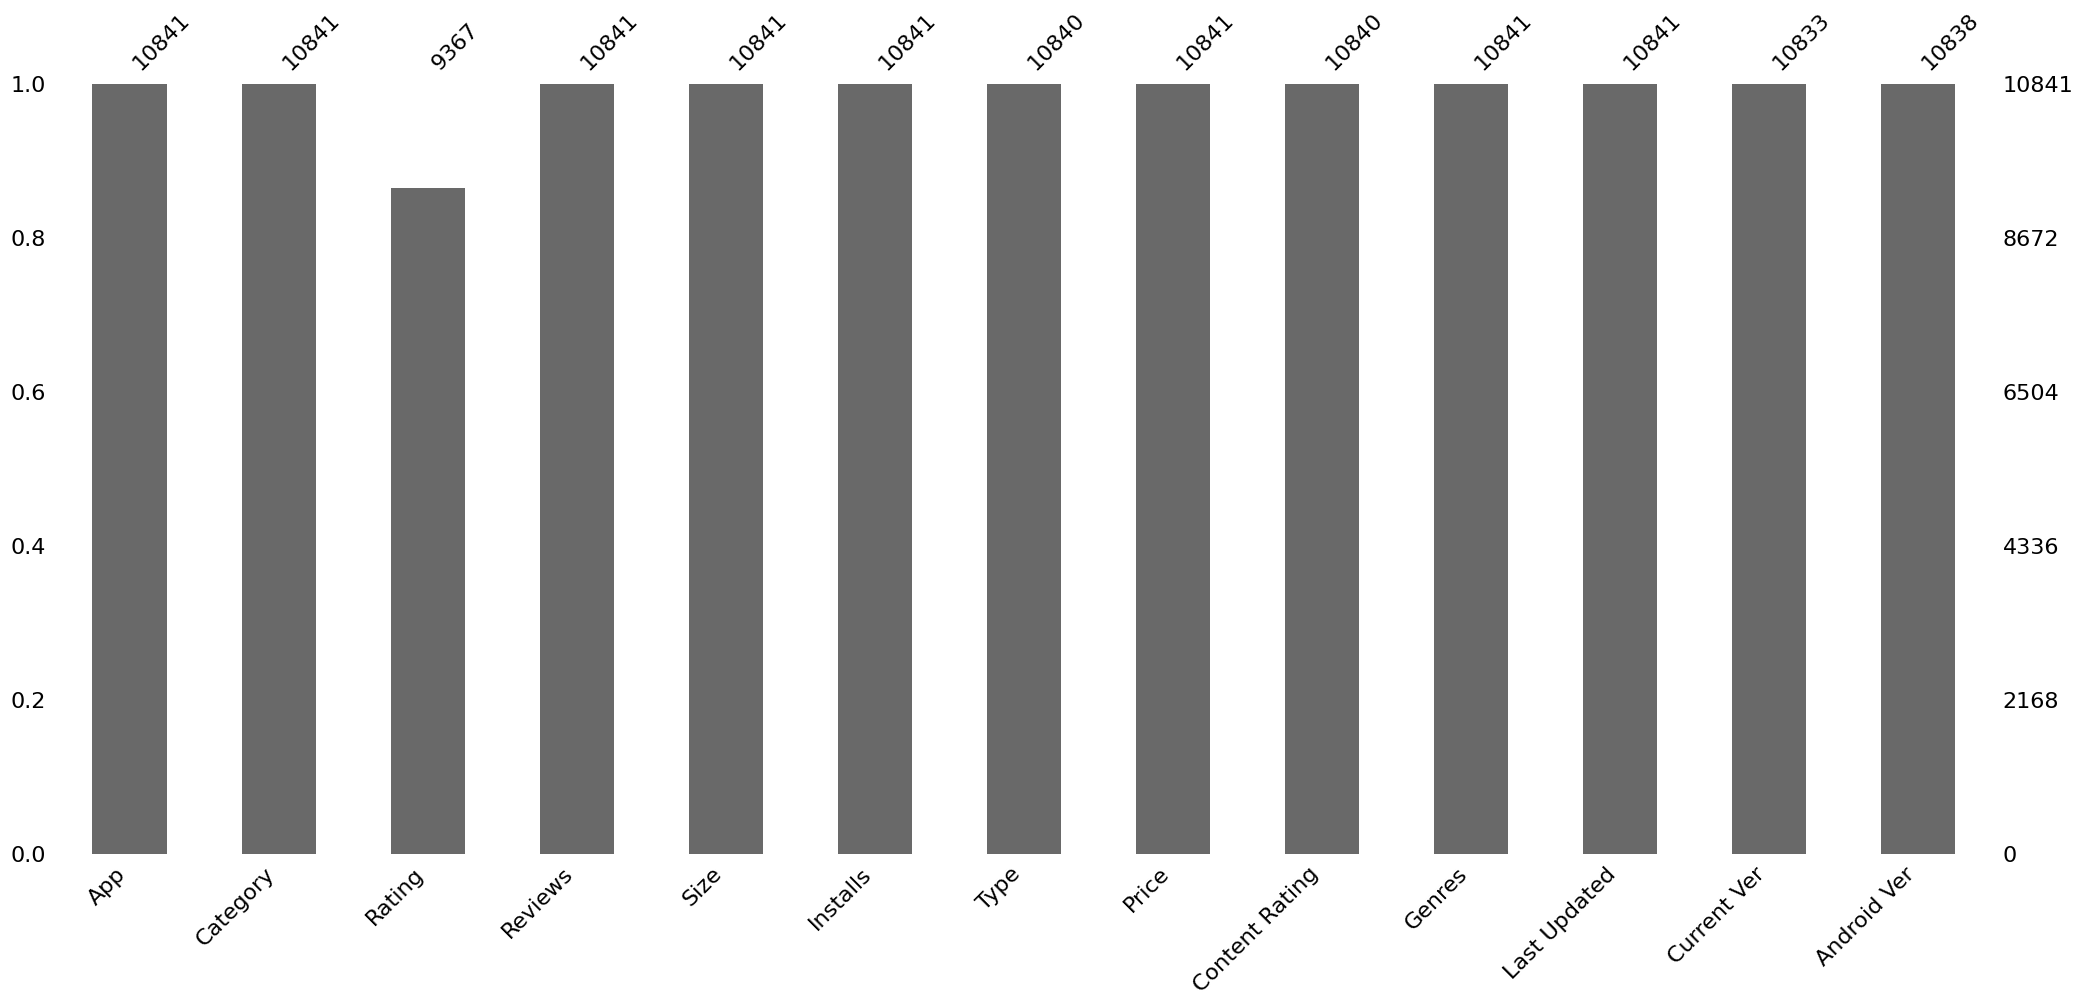

In [11]:
# Visualizing the missing values
msno.bar(play_store_data)

### What did you know about your dataset?

The following columns contains null values in the dataset:


- Rating
- Type
- Content Rating
- Current Ver
- Android Ver

All the columns contain object data type except for 'Rating' which has float type.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
play_store_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [20]:
# Dataset Describe
print("Dataset numerical summary:")
print('_'*40)
print(play_store_data.describe())

Dataset numerical summary:
________________________________________
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


### Variables Description


1.App : indicates the name of the apps (this column has duplicate values in the
        rows)

2.Category : this indicates the various categories of the apps

3.Rating: this indicates the ratings recieved by the respective apps

4.Reviews: this indicates the number or reviews recieved by the app

5.Size :indicates the size of the app

6.Installs: indicates the number of installs of the respective app

7.Type: Shows the type of the app which is free or paid

8.Price: this field shows the price of the fields, 0 for free and amount if paid

9.Content Rating: shows the targated audiance of the app and what type of
                  audiance has reviewed the app

10.Genres: shows the Genre of the app, (same as category)

11.Last Updated: shows the latest date of the app that has updated

12.Current Ver: shows the latest version of the app

13.Androaid Ver: shows the version of android which can support the given app




### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
unique_var = []
for val in play_store_data.columns:
  x = play_store_data[val].value_counts().count()
  unique_var.append(x)

df1 = pd.DataFrame(unique_var, index = play_store_data.columns, columns =['Value count'])
df1

,Value count
App,9660
Category,34
Rating,40
Reviews,6002
Size,462
Installs,22
Type,3
Price,93
Content Rating,6
Genres,120


## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:
# Write your code to make your dataset analysis ready.
def convert_to_int(x):
    '''
    Converts a string representation of a number to an integer
    '''
    # Remove special characters
    x = x.replace(',', '').replace('+', '').replace('$', '')

    if x.isdigit():
        # Return the integer value if the input is already a valid number
        return int(x)
    elif 'M' in x:
        # Convert millions to integer by multiplying with 10^6
        return int(float(x.replace('M', '')) * 10**6)
    elif 'k' in x:
        # Convert K to integer by multiplying with 10^3
        return int(float(x.replace('k', '')) * 10**3)
    elif x in ['Free', 'Varies with device', 'Everyone']:
        # Handle special cases where the value is not a number
        return 0
    else:
        # Evaluate the remaining expressions
        return int(eval(x))


In [25]:
play_store_data['Reviews'] = play_store_data['Reviews'].apply(convert_to_int)
play_store_data['Size'] = play_store_data['Size'].apply(convert_to_int)
play_store_data['Installs'] = play_store_data['Installs'].apply(convert_to_int)
play_store_data['Price'] = play_store_data['Price'].apply(convert_to_int)

### What all manipulations have you done and insights you found?

- After conducting extensive analyses on the dataset, the following data transformations have been performed.

In [26]:
outlier1 = play_store_data[play_store_data['Rating']>5]
outlier1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,1000,0,0,0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [63]:
play_store_data.loc[play_store_data['Rating']==19,'Rating'] = 1.9

In [64]:
play_store_data[play_store_data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


- We can see that earlier there was a rating which was way higher than the standard rating limit, but now we have resolve that issue.

In [31]:
play_store_data['Category']

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10841, dtype: object

In [32]:
# There are underscores in between some variables name so we will remove them
def remove_underscore(var):
  if '_' in var:
    var=var.replace('_',' ')
  return var

In [33]:
play_store_data['Category'] = play_store_data['Category'].apply(remove_underscore)

In [34]:
play_store_data['Category']

0             ART AND DESIGN
1             ART AND DESIGN
2             ART AND DESIGN
3             ART AND DESIGN
4             ART AND DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS AND REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10841, dtype: object

In [36]:
# Now we will handle the missing values
play_store_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [55]:
missing_value_percent = round((play_store_data['Rating'].isnull().sum())/len(play_store_data['Rating'])*100,2)
missing_value_percent

13.6

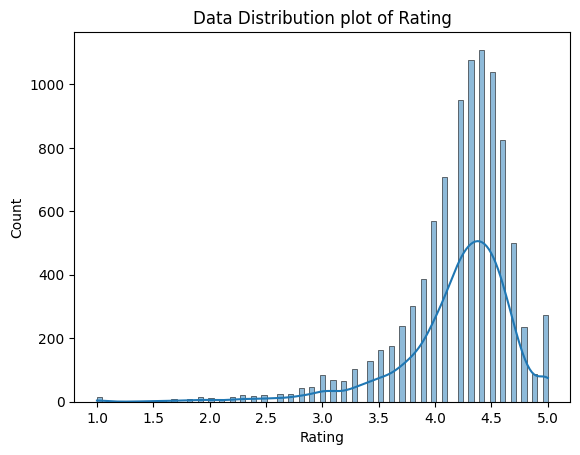

In [65]:
#By ploting distribution plot we can choose between mean amd median.
plt.title('Data Distribution plot of Rating')

sns.histplot(play_store_data['Rating'],kde = True)
plt.show()

- Since the distribution is skewed it advisable to use median to handle the missing values as median is less sensitive to outliers.

In [39]:
# fill the missing values with the median value
median_value = play_store_data['Rating'].median()
median_value = round(median_value, 2)
play_store_data['Rating'] = play_store_data['Rating'].fillna(median_value)
print(f'Missing values will be replaced by: {median_value}')

Missing values will be replaced by: 4.3


- And the other missing values, we will just drop them as they are very less

In [46]:
play_store_data.shape

(10841, 13)

In [41]:
#drop the missing values and store it in a new dataframe
new_df = play_store_data.dropna(subset= ['Type', 'Content Rating', 'Current Ver', 'Android Ver'])

In [47]:
new_df.shape

(10829, 13)

In [49]:
dup_count = new_df['App'].duplicated().sum()
print(f'Total duplicate values: {dup_count}')

Total duplicate values: 1181


In [50]:
new_df = new_df.drop_duplicates(subset=['App'], keep='first')

In [51]:
dup_count = new_df['App'].duplicated().sum()
print(f'Total duplicate values: {dup_count}')

Total duplicate values: 0


#### Data Manipulation summary:
- There were 13.6% missing values in Rating column and we replaced it with the median value.

- The following data preprocessing steps were performed:

> - Outlier Removal: Outliers were removed from the "Rating" column.
- Underscore Removal: Underscores were removed from the required columns.
- Data Type Conversion: The data types of columns were converted from object to integer or float as required.
- Missing Value Handling: Missing values in the dataset were handled.


These preprocessing steps were applied to enhance the quality and consistency of the data for further analysis or modeling tasks.



In [56]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   int64  
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   int64  
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.0+ MB


In [57]:
new_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9648.000000,9.648000e+03,9.648000e+03,9.648000e+03,9648.000000
mean,4.192465,2.168369e+05,1.781989e+07,7.786211e+06,1.030991
std,0.496552,1.832349e+06,2.150200e+07,5.378830e+07,16.808582
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,2.900000e+06,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,9.200000e+06,1.000000e+05,0.000000
75%,4.500000,2.944925e+04,2.500000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [58]:
new_df.shape

(9648, 13)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
- Distribution of Rating across various apps

Text(0, 0.5, 'Count')

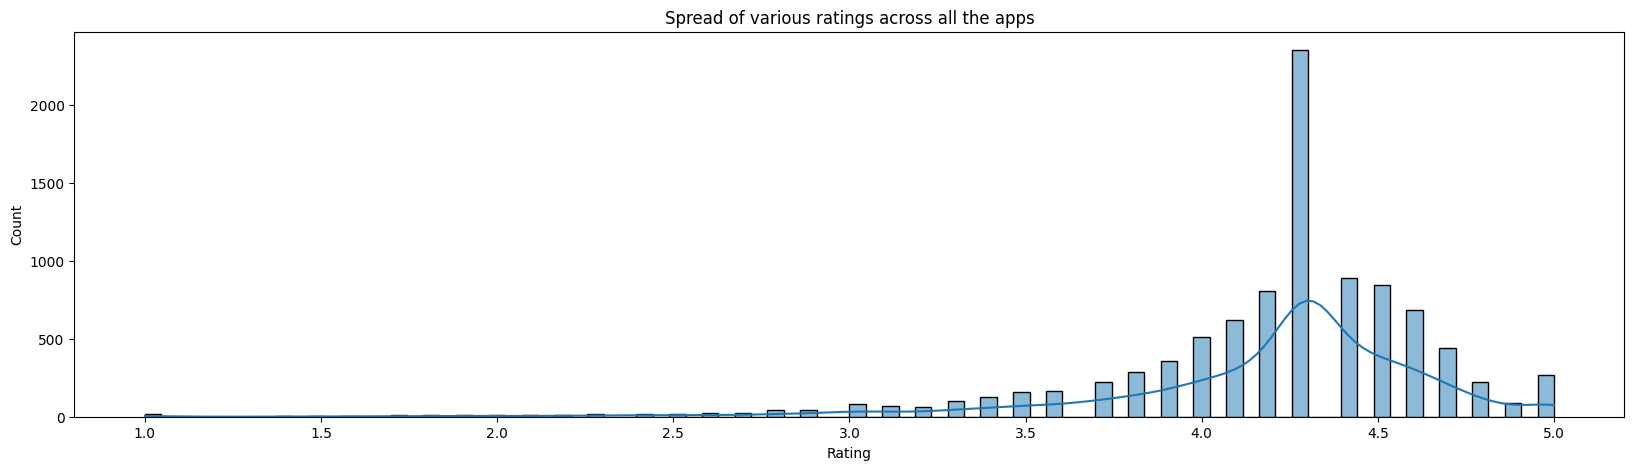

In [67]:
# Chart - 1 visualization code
plt.rcParams['figure.figsize'] = (20, 5)
sns.histplot(new_df, x='Rating', kde=True)

#Describing details for the plots
plt.title('Spread of various ratings across all the apps')
plt.xlabel('Rating')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

*Histplots are a great for analyzing the distribution of numerical values*

##### 2. What is/are the insight(s) found from the chart?

*It is clear from the chart that majority of the apps are rated 4.25*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Since many apps have a rating of 4.2, it indicates that there is an opportunity to create a new app that can better meet the needs of the market*

#### Chart - 2

- Paid app counts with respect to price



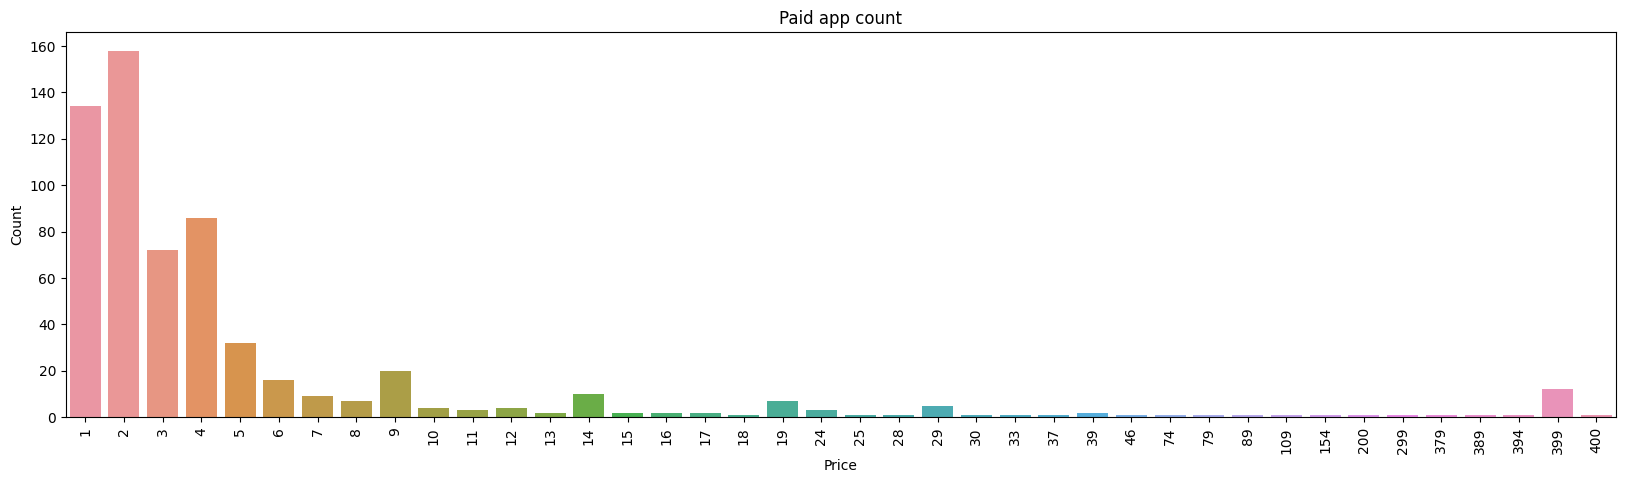

In [68]:
# Chart - 2 visualization code
free_app_value = 0
plt.rcParams['figure.figsize'] = (20, 5)

# This variable is created to filter out the free apps from the new_df DataFrame
df_without_free_apps = new_df['Price'] != free_app_value
sns.countplot(data=new_df[df_without_free_apps], x='Price')

plt.xticks(rotation=90)
plt.title('Paid app count')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

*A seaborn count plot displays the number of occurrences of apps based on different values. In this case, we are interested in knowing the count of apps that have a non-zero price.*

##### 2. What is/are the insight(s) found from the chart?

*We can see clearly that most number of apps are priced at 2 followed by 1.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Majority of the apps are priced between 1 to 9*

*So it would be a good thing if we can make an app that falls in this price range*

#### Chart - 3

- User comparison between paid and free app

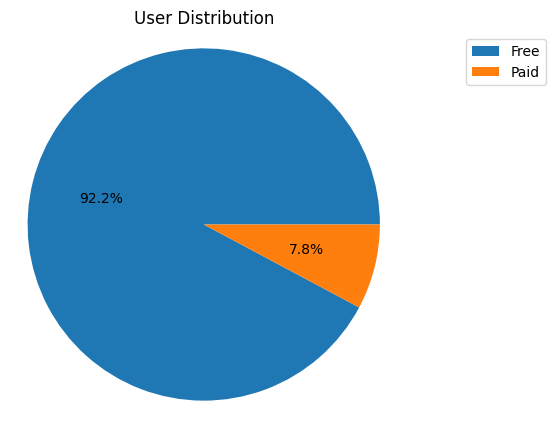

In [70]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))
number_of_apps = new_df['Type'].value_counts()

# Get the labels and sizes for the pie chart
labels = number_of_apps.index
size = number_of_apps.values

# Set the labels to be the app types and position the legend using bbox_to_anchor
ax.pie(size, labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="upper right",bbox_to_anchor=(0.9, 0, 0.5, 1))


# Set the aspect ratio of the plot to be equal to make it a circle
ax.axis("equal")
plt.title('User Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

*Pie chart is particularly useful when you want to represent the proportions or percentages of different categories within a dataset.*

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

- Apps with the lowest ratings by category


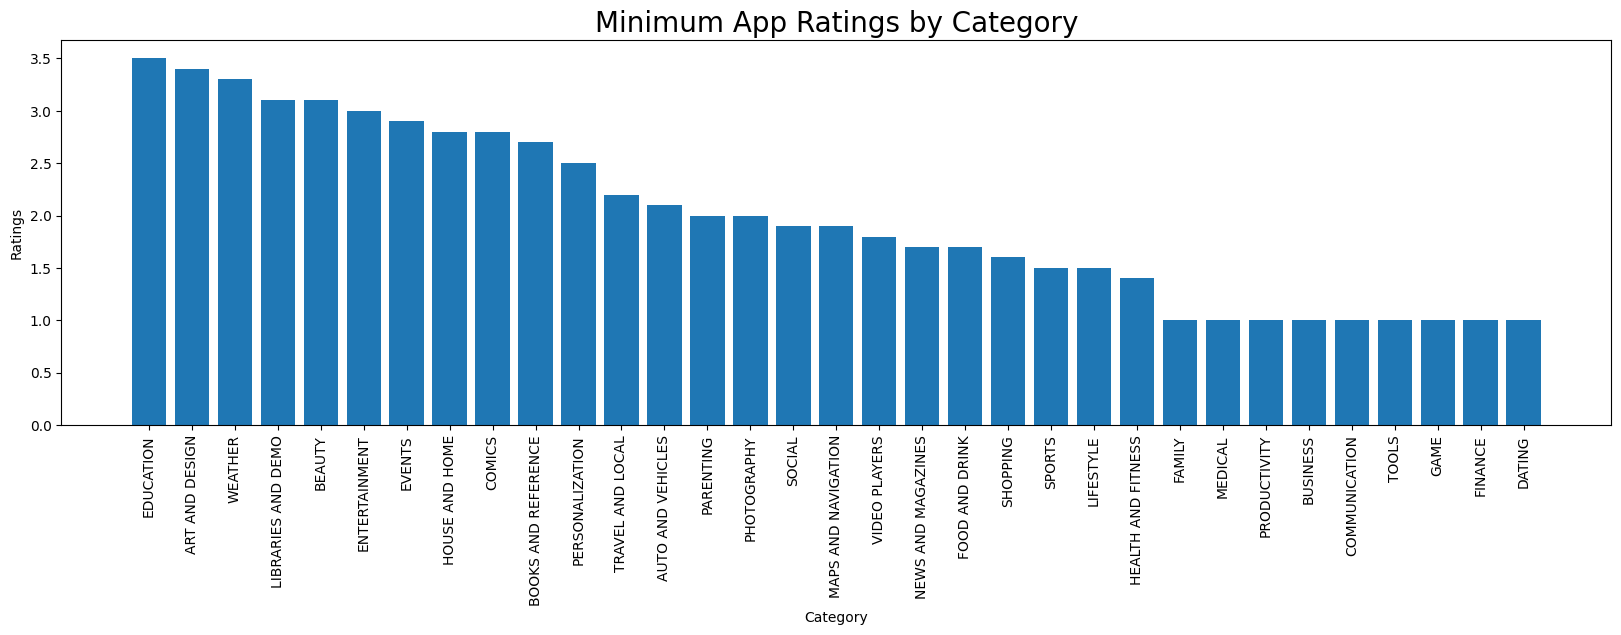

In [73]:
# Chart - 4 visualization code

# Group the DataFrame by 'Category' and calculate the minimum 'Rating' for each category
category_avg_rating = new_df.groupby('Category')['Rating'].min().sort_values(ascending=False)

# Set the size of the plot
plt.rcParams['figure.figsize'] = (20, 5)

# Create a bar plot using the category_avg_ratings index (categories) as the x-axis and the values (minimum ratings) as the y-axis
plt.bar(category_avg_rating.index, category_avg_rating.values)

# Set the title and labels for the plot
plt.title('Minimum App Ratings by Category',fontsize=20)
plt.xlabel('Category')
plt.ylabel('Ratings')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

*Bar charts are effective for comparing categorical data. In this case, the categories are the different ratings*

##### 2. What is/are the insight(s) found from the chart?

*By identifying the categories with the lowest-rated apps, we can identify areas where there is a need for improvement. We can then work to create apps that are exceptional in these categories, and thus stand out from the competition.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*The fact that many apps have low ratings shows that there is a demand for better apps*

#### Chart - 5

- Popularity of free and paid apps by category

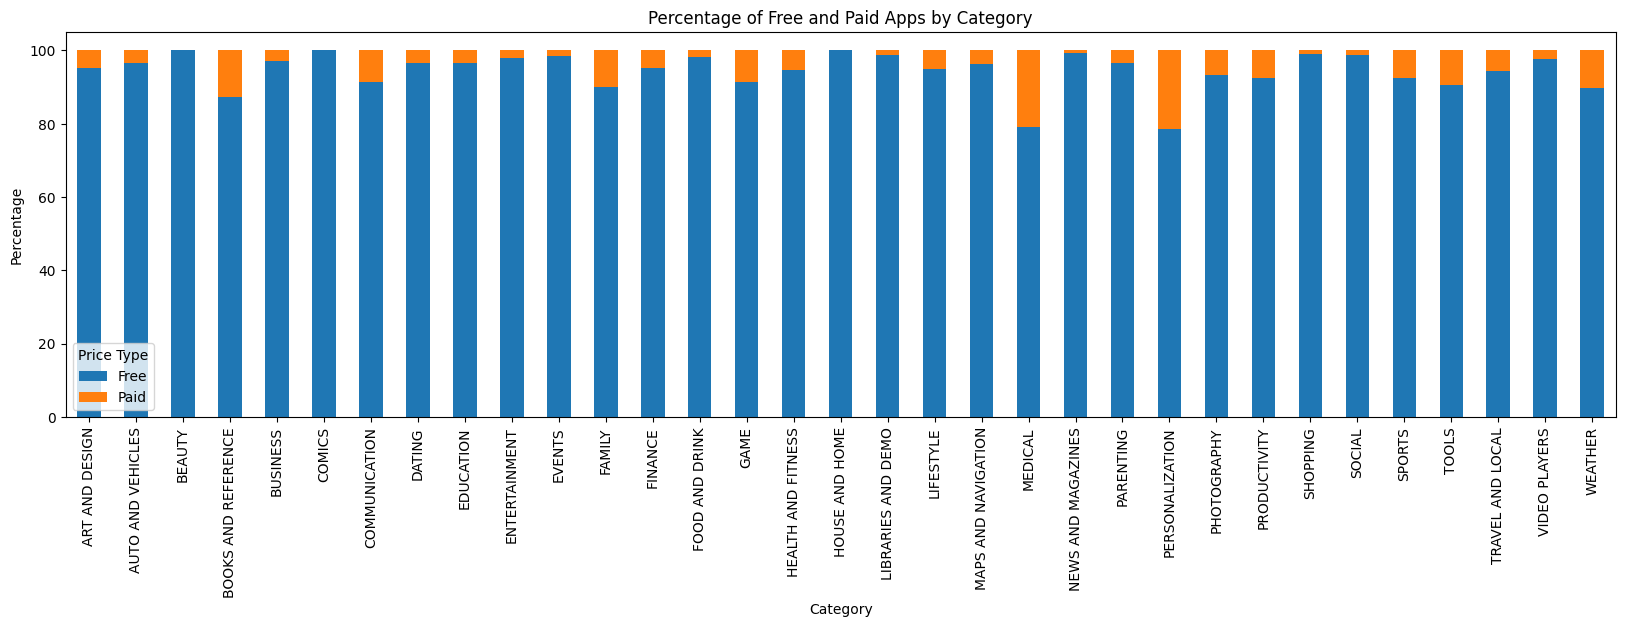

In [74]:
# Chart - 5 visualization code

# Group the dataframe by 'Category' and 'Type' and count the occurrences of each combination
category_price_counts = new_df.groupby(['Category', 'Type']).size().unstack()

# Calculate the total counts for each category by summing the counts across price types
total_counts = category_price_counts.sum(axis=1)

# Calculate the percentage ratios of each price type within each category
category_price_ratios = category_price_counts.div(total_counts, axis=0) * 100

# Create a stacked bar chart using the category_price_ratios dataframe
category_price_ratios.plot(kind='bar', stacked=True)
plt.title('Percentage of Free and Paid Apps by Category')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.legend(title='Price Type')
plt.show()


##### 1. Why did you pick the specific chart?

*A stacked bar plot is a good choice for this data because it allows us to compare the percentage of paid apps in each category to the percentage of free apps*

##### 2. What is/are the insight(s) found from the chart?

*The chart shows that the percentage of paid apps in the Personalization and Medical categories is higher than in other categories. This suggests that users are willing to pay for apps in these categories*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*The insights from the chart could help businesses to create a positive business impact by helping them to:*

- Identify categories of apps that are popular with users and where there is a demand for paid apps.
- *Make decisions about which categories of apps to focus on when developing or marketing apps.*
- *Price their apps appropriately.*

*The insights from the chart could also lead to negative growth if businesses make decisions that are not aligned with the needs of users*

#### Chart - 6
- Count of Apps by category

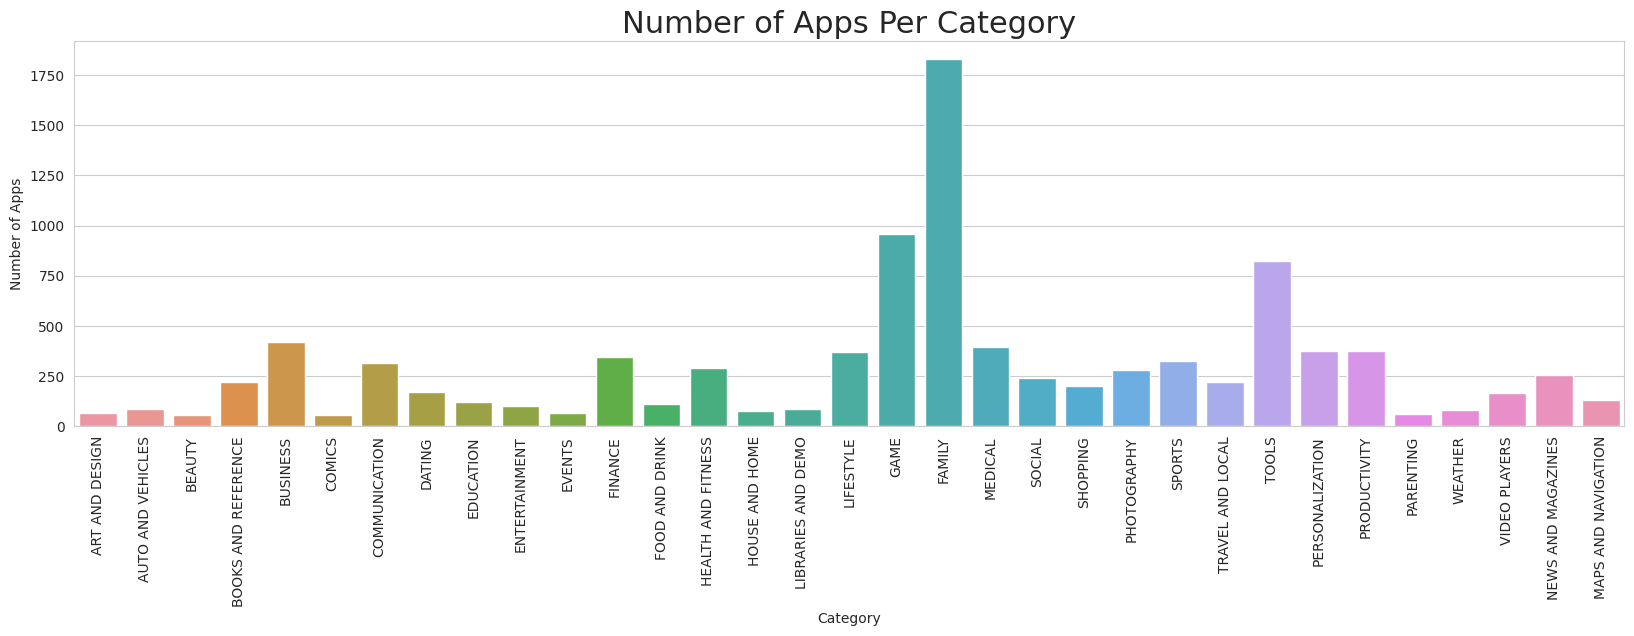

In [76]:
# Chart - 6 visualization code

sns.set_style('whitegrid')
plt.figure(figsize=(20, 5))
sns.countplot(x='Category', data=new_df)
plt.title('Number of Apps Per Category', fontsize = 22)
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()


##### 1. Why did you pick the specific chart?

*We picked the seaborn count plot because it is a good way to visualize the share of the number of apps across various categories. The count plot shows the number of apps in each category as bars. This makes it easy to see which categories have the most apps and which categories have the least apps.*

##### 2. What is/are the insight(s) found from the chart?

*The insights found from the chart are:*

- *The Family category has the most apps, with 18.5% of the total number of apps.*
- *The Games category has the second most apps, with 9.94% of the total number of apps.*
- *The Tools category has the third most apps, with 8.55% of the total number of apps.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Yes, the gained insights can help create a positive business impact. By understanding the market size of the categories in which we are trying to make our new app, we can make better decisions about what features to include in our app and how to market our app.*

#### Chart - 7
- User sentiment analysis

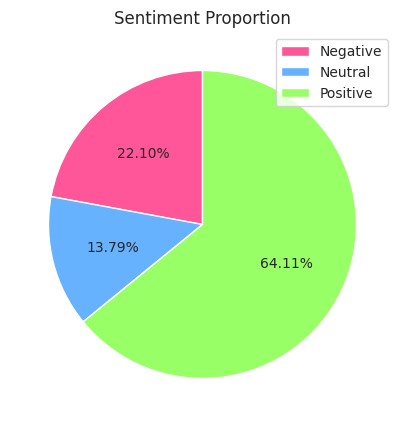

In [91]:
# Chart - 7 visualization code

user_review = pd.read_csv('/content/drive/MyDrive/Project_Data/User Reviews.csv')

# Grouping the DataFrame by 'Sentiment' column
sentiment_group = user_review.groupby('Sentiment')

# Counting the occurrences of each sentiment category
s = sentiment_group['Sentiment'].count()

# Define custom colors for the chart
colors = ['#FF5599', '#66b2ff', '#99ff66']

# Creating a pie chart to visualize the share of each sentiment category
plt.figure(figsize=(5,5))
plt.pie(s, startangle=90, autopct='%1.2f%%', colors= colors)
plt.legend(labels=s.index,loc='upper right')
# Adding a title to the plot
plt.title('Sentiment Proportion')
plt.show()


##### 1. Why did you pick the specific chart?

*A pie chart is a good choice for this data because it is a visual way to show the proportions of the different sentiment categories.*

##### 2. What is/are the insight(s) found from the chart?

*The main insight from the chart is that most apps have positive sentiment. This is good news for app developers, as it suggests that their apps are generally well-received by users.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*By understanding that most apps have positive sentiment, developers can focus on continuing to improve their apps and providing a good user experience. This can help to increase the number of positive reviews and boost app downloads*

#### Chart - 8
- Total Downloads in each category

Text(0.5, 1.0, 'Total App Downloads in each category')

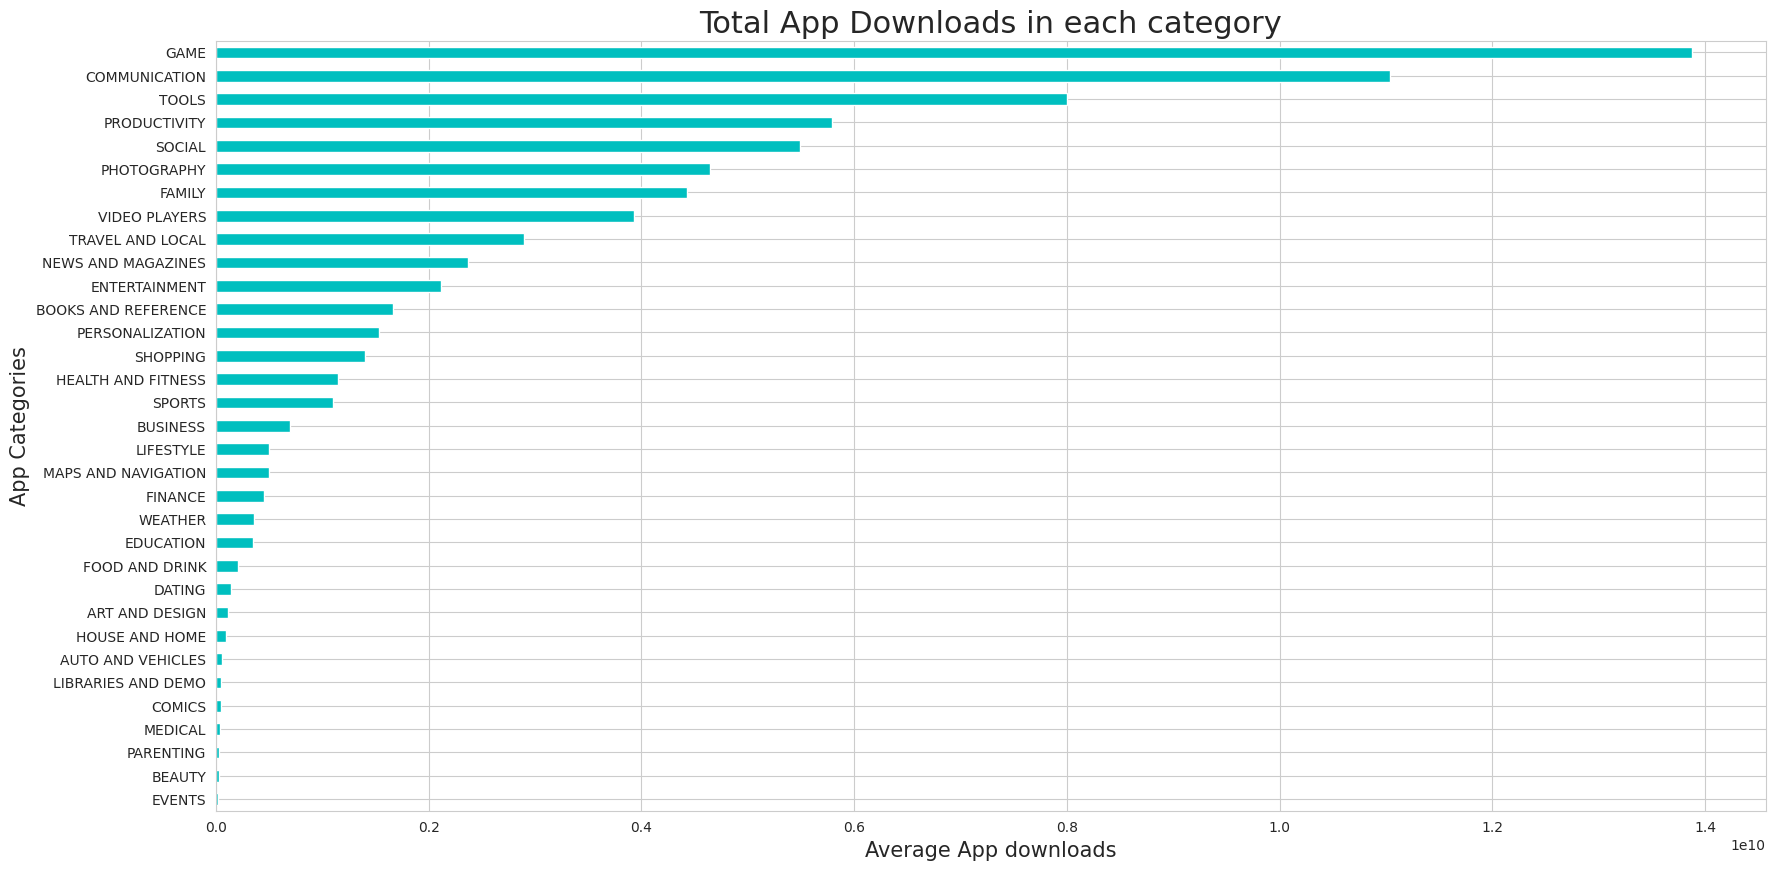

In [93]:
# Chart - 8 visualization code
total_installs = new_df.groupby(['Category'])['Installs'].sum().sort_values()

#plotting
total_installs.plot.barh(figsize=(20,10), color = 'c', )
plt.ylabel('App Categories', fontsize = 15)
plt.xlabel('Average App downloads', fontsize = 15)
plt.title('Total App Downloads in each category', fontsize = 22)

##### 1. Why did you pick the specific chart?

*The horizontal bar chart because it is a good way to compare the number of installs for different categories of apps. The horizontal orientation of the chart makes it easier to read the category names, which can be long in this case*

##### 2. What is/are the insight(s) found from the chart?

*The gaming category has the most downloads, followed by the communication category and the tools category.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*The insights can help the company allocate resources more effectively. For example, the company may decide to focus more on developing gaming apps, as these apps are more popular with users.*

#### Chart - 9
- App ratings with respect to category

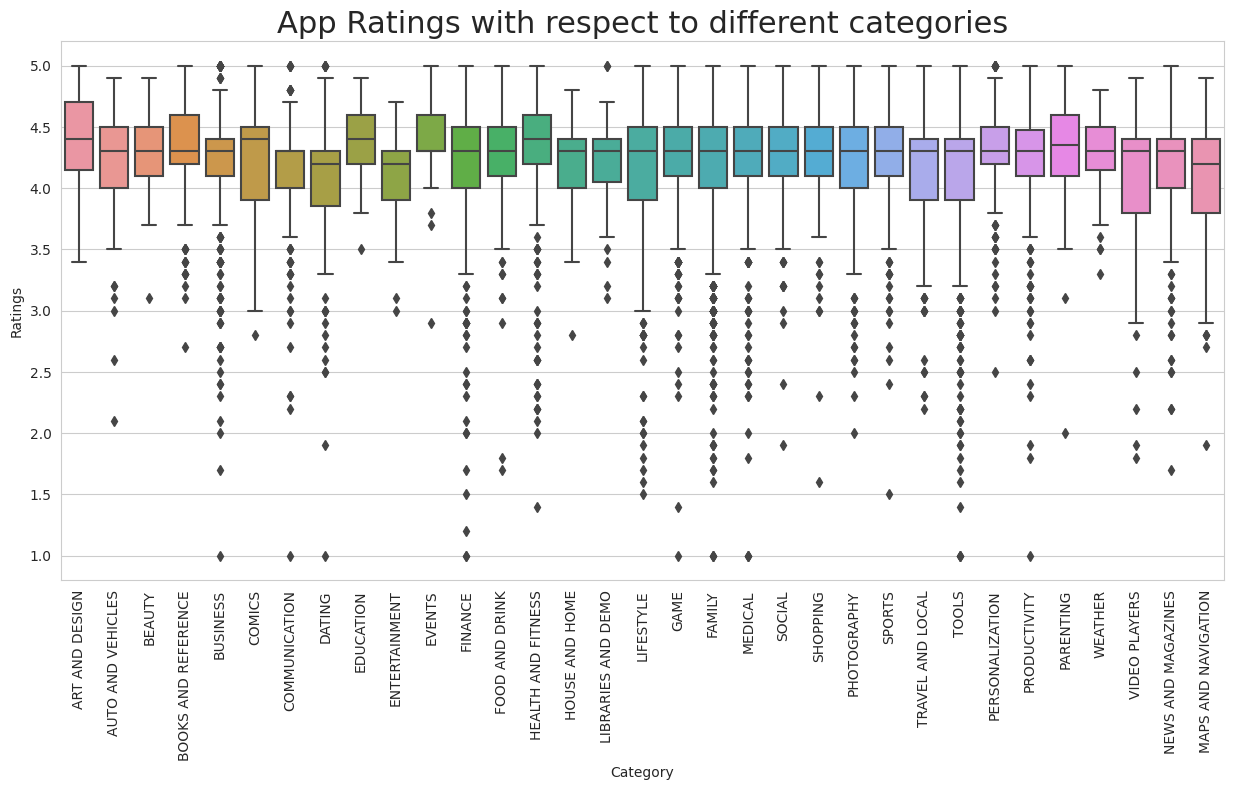

In [97]:
# Chart - 9 visualization code

plt.rcParams['figure.figsize'] = (15,8)

#Plot Code
sns.boxplot(data=new_df, x="Category", y="Rating")

#Describing details for the plots
plt.title('App Ratings with respect to different categories',fontsize=22)
plt.xlabel('Category')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

*Because it is a concise and effective way to visualize data distributions. It shows the median, quartiles, and outliers, which can help quickly identify the key characteristics of a dataset. This makes it easy to compare multiple datasets and identify any differences or similarities.*

##### 2. What is/are the insight(s) found from the chart?

*The boxplot shows that the median ratings for the communication and events categories are outside the box. This means that the ratings for these categories are not skewed, and there is a relatively even distribution of ratings*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*The insights from the boxplot can help to create a positive business impact by identifying opportunities for improvement. For example, the outliers below the boxes show that various apps in category are having bad reviews. This means that there is room for our app to enter these categories and provide better features and functionality than the existing apps. This could lead to increased downloads and revenue for our app.*

#### Chart - 10
- App content ratings for different age groups

In [98]:
new_df['Content Rating'].value_counts()

Everyone           7893
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

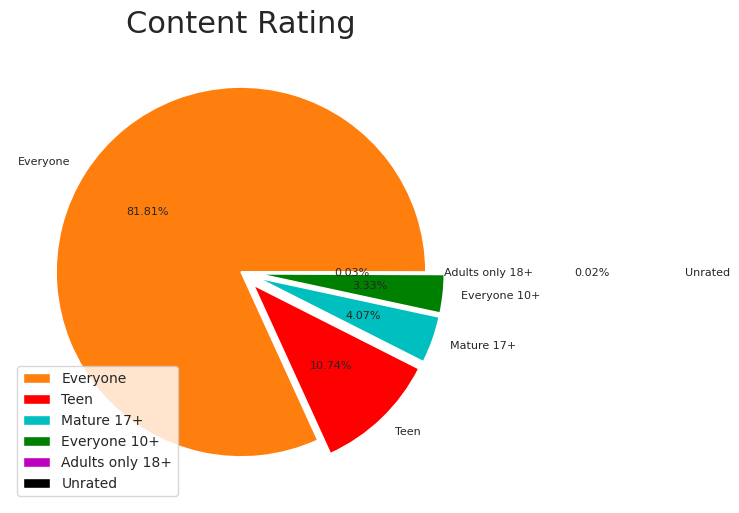

In [105]:
# Chart - 10 visualization code
# Content rating of the apps for different age groups
data = new_df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Mature 17+','Everyone 10+','Adults only 18+', 'Unrated']

#plotting pie chart
plt.figure(figsize=(8,6))
explode=(0,0.1,0.1,0.1,0.0,1.3)
color = ['C1', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = color, autopct='%.2f%%',explode=explode,textprops={'fontsize': 8})
plt.title('Content Rating',fontsize=22)
plt.legend(loc='best')
plt.show()

##### 1. Why did you pick the specific chart?

*Pie charts are a good choice for displaying data that can be divided into a small number of categories.*

##### 2. What is/are the insight(s) found from the chart?

*The pie chart shows that most apps (81.81%) are open to be reviewed by Everyone. This means that anyone can leave a review of the app, regardless of their age.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*By making reviews open to everyone, app developers can increase the number of reviews their app receives.*

#### Chart - 11
- Top 10 apps by category

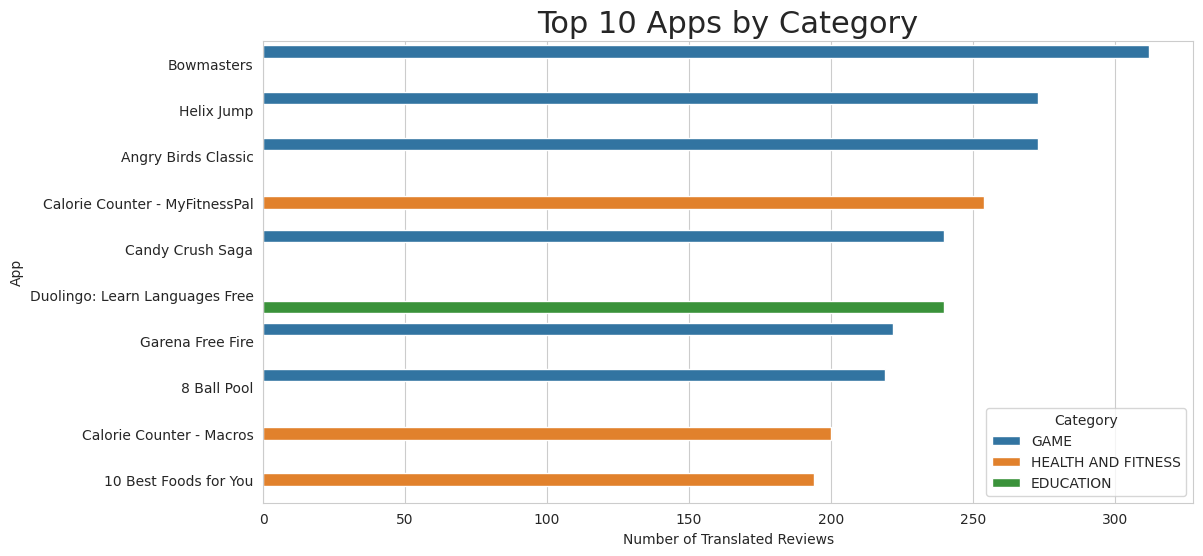

In [108]:
# Chart - 11 visualization code
# merging playstore review and user review dataframes
merged_df =pd.merge(new_df,user_review,how='inner',on='App')
app_cat_df = merged_df.groupby(['App','Category'])['Translated_Review'].count().reset_index()
app_cat_df = pd.DataFrame(app_cat_df)
app_cat_df = app_cat_df.sort_values(by=['Translated_Review'], ascending=False)
# app_cat_df.head(10)

# Plot the chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Translated_Review', y='App', hue='Category', data=app_cat_df.head(10))
plt.title('Top 10 Apps by Category',fontsize=22)
plt.xlabel('Number of Translated Reviews')
plt.ylabel('App')
plt.legend(title='Category')
plt.show()

##### 1. Why did you pick the specific chart?

*The chart shows the apps that received the most translated reviews.*

##### 2. What is/are the insight(s) found from the chart?

*The chart shows that the Game category received the most translated reviews. This suggests that international users are particularly interested in games.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- *Identify which app categories are most popular with international users.*

- *Target our marketing efforts to these app categories.*

#### Chart - 12
- Sentiment visualization

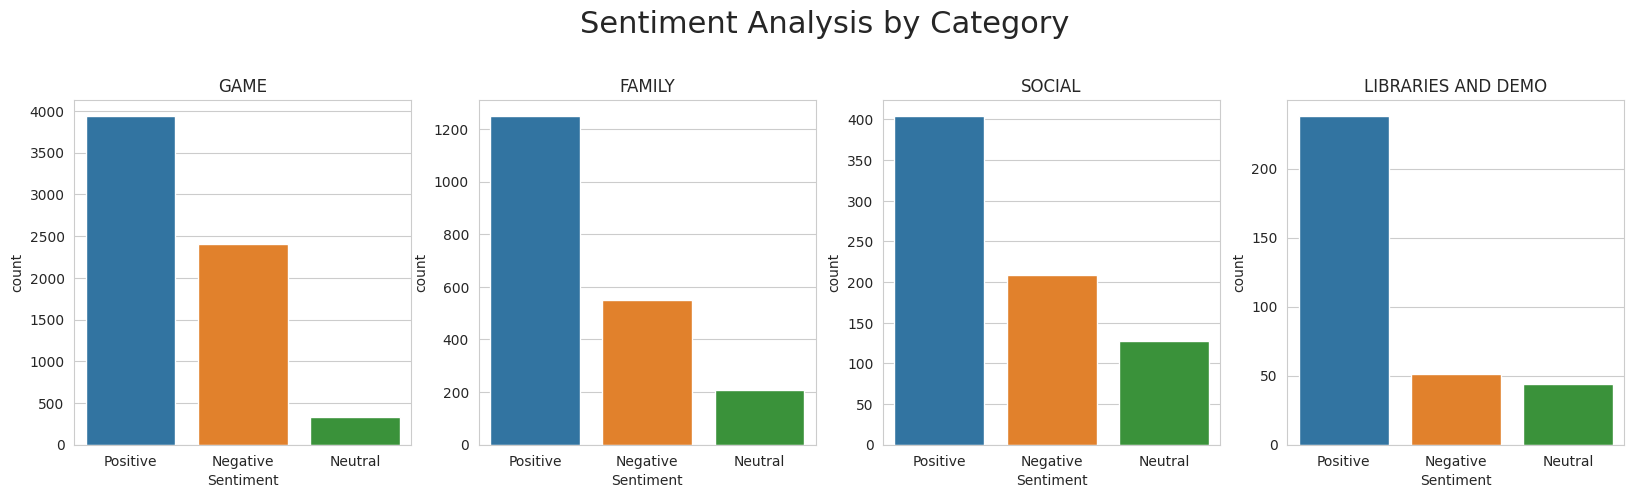

In [111]:
# Chart - 12 visualization code

x=['GAME','FAMILY','SOCIAL', 'LIBRARIES AND DEMO']

# Create subplots with one row and a number of columns equal to the length of x
fig, axes = plt.subplots(1, len(x), figsize=(20, 5))

# Iterate over each category in x
for i, category in enumerate(x):
    # Filter the merged_df dataframe for the current category
    temp_df = merged_df[merged_df['Category'] == category]
    sns.countplot(data=temp_df, x='Sentiment', ax=axes[i])
    axes[i].set_title(category)

# Set the main title for the entire figure
fig.suptitle('Sentiment Analysis by Category',fontsize=22)

# Adjust the spacing under the title
plt.subplots_adjust(top=0.8)
plt.show()

##### 1. Why did you pick the specific chart?

*It allows us to visualize the counts of different sentiments (positive, negative, neutral) for each app category. This helps us to quickly and easily see which categories have the most positive and negative sentiments.*

##### 2. What is/are the insight(s) found from the chart?

*The chart shows that the majority of apps in the GAME, FAMILY, SOCIAL, LIBRARIES, and DEMO categories have positive sentiments. However, the SOCIAL category also has a significant number of negative sentiments.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*These insights could help to create a positive business impact. For example, app developers could use this information to improve the quality of their apps in the SOCIAL category in order to reduce the number of negative sentiments. This could lead to increased user satisfaction and increased sales.*

#### Chart - 13
-

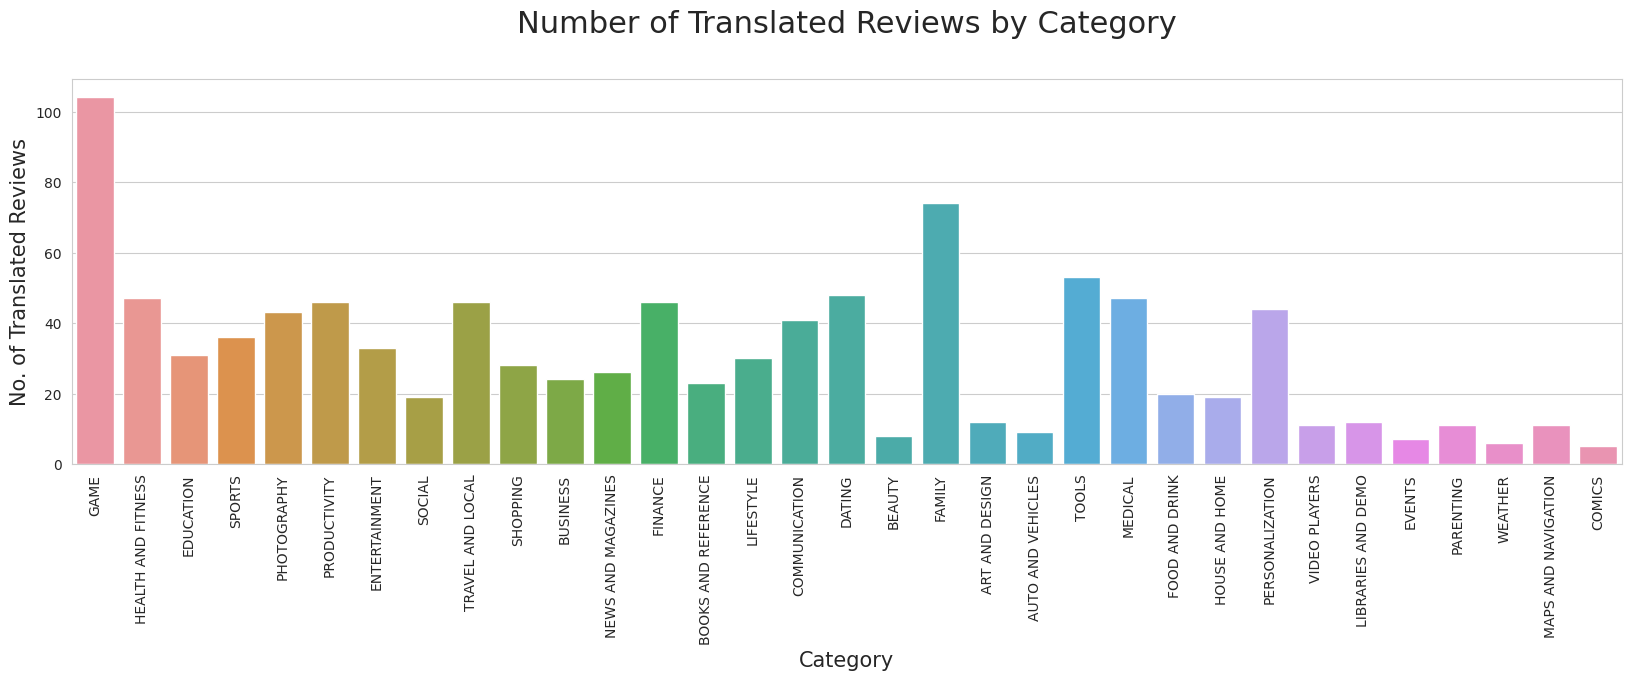

In [119]:
# Chart - 13 visualization code

plt.figure(figsize=(20, 5))

#plot the chart
sns.countplot(data = app_cat_df, x = app_cat_df['Category'])

# Setting attributes to infer the plot
plt.title('Number of Translated Reviews by Category',fontsize=22,y=1.1)
plt.ylabel('No. of Translated Reviews',fontsize=15)
plt.xlabel('Category',fontsize=15)
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

*A count plot is a good choice for this data because it shows the number of reviews for each app category, which is the information we are interested in*

##### 2. What is/are the insight(s) found from the chart?

- *The games category has received the most reviews, followed by the family category.*

- *The comics, weather, and events categories have received the fewest reviews.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*The insights from this chart could help businesses to make better decisions about their app development and marketing strategies.*

#### Chart - 14 - Correlation Heatmap

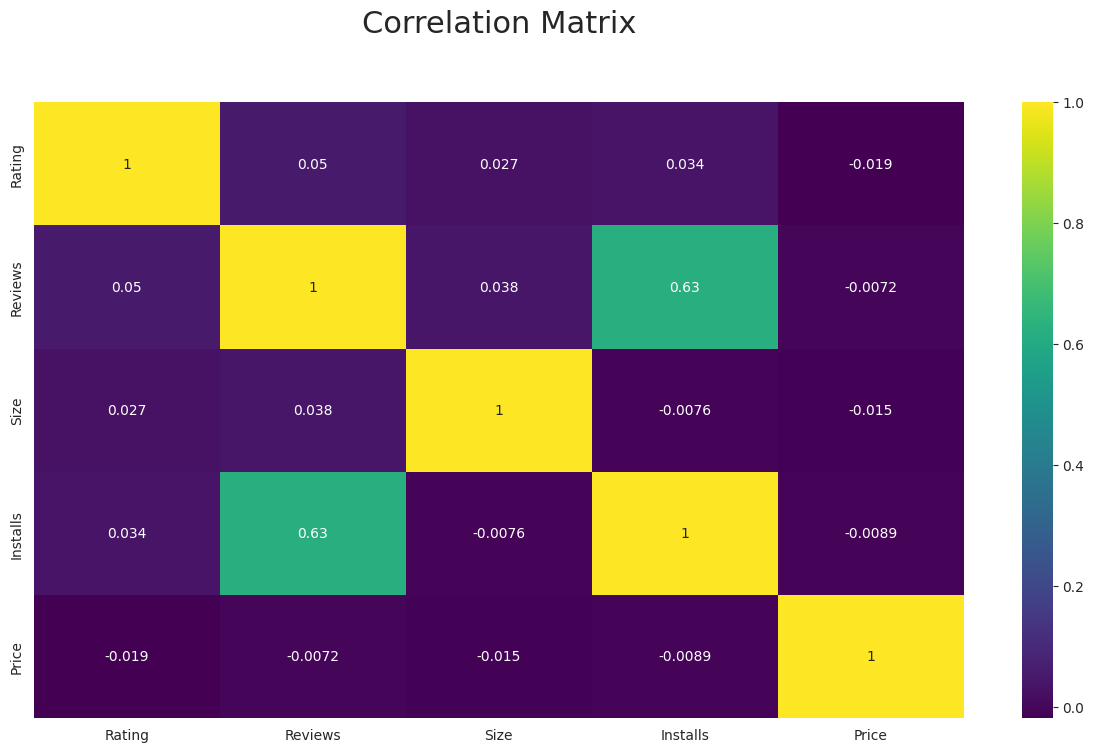

In [129]:
# Correlation Heatmap visualization code
corr_matrix = new_df.corr()

# plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

#setting labels to infer the plot
plt.title('Correlation Matrix',fontsize=22,y=1.1)
plt.show()

##### 1. Why did you pick the specific chart?

*A heatmap is a great way to visualize the correlation between multiple variables. The colors in the heatmap represent the strength of the correlation, with darker colors indicating a stronger correlation. This makes it easy to see at a glance which variables are most correlated with each other.*

##### 2. What is/are the insight(s) found from the chart?

- *The main insight that can be found from the chart is that reviews are an important factor in driving installs.*

- *Another insight that can be found from the chart is that there is a weak negative correlation between the size of an app and the number of installs.*

#### Chart - 15 - Pair Plot

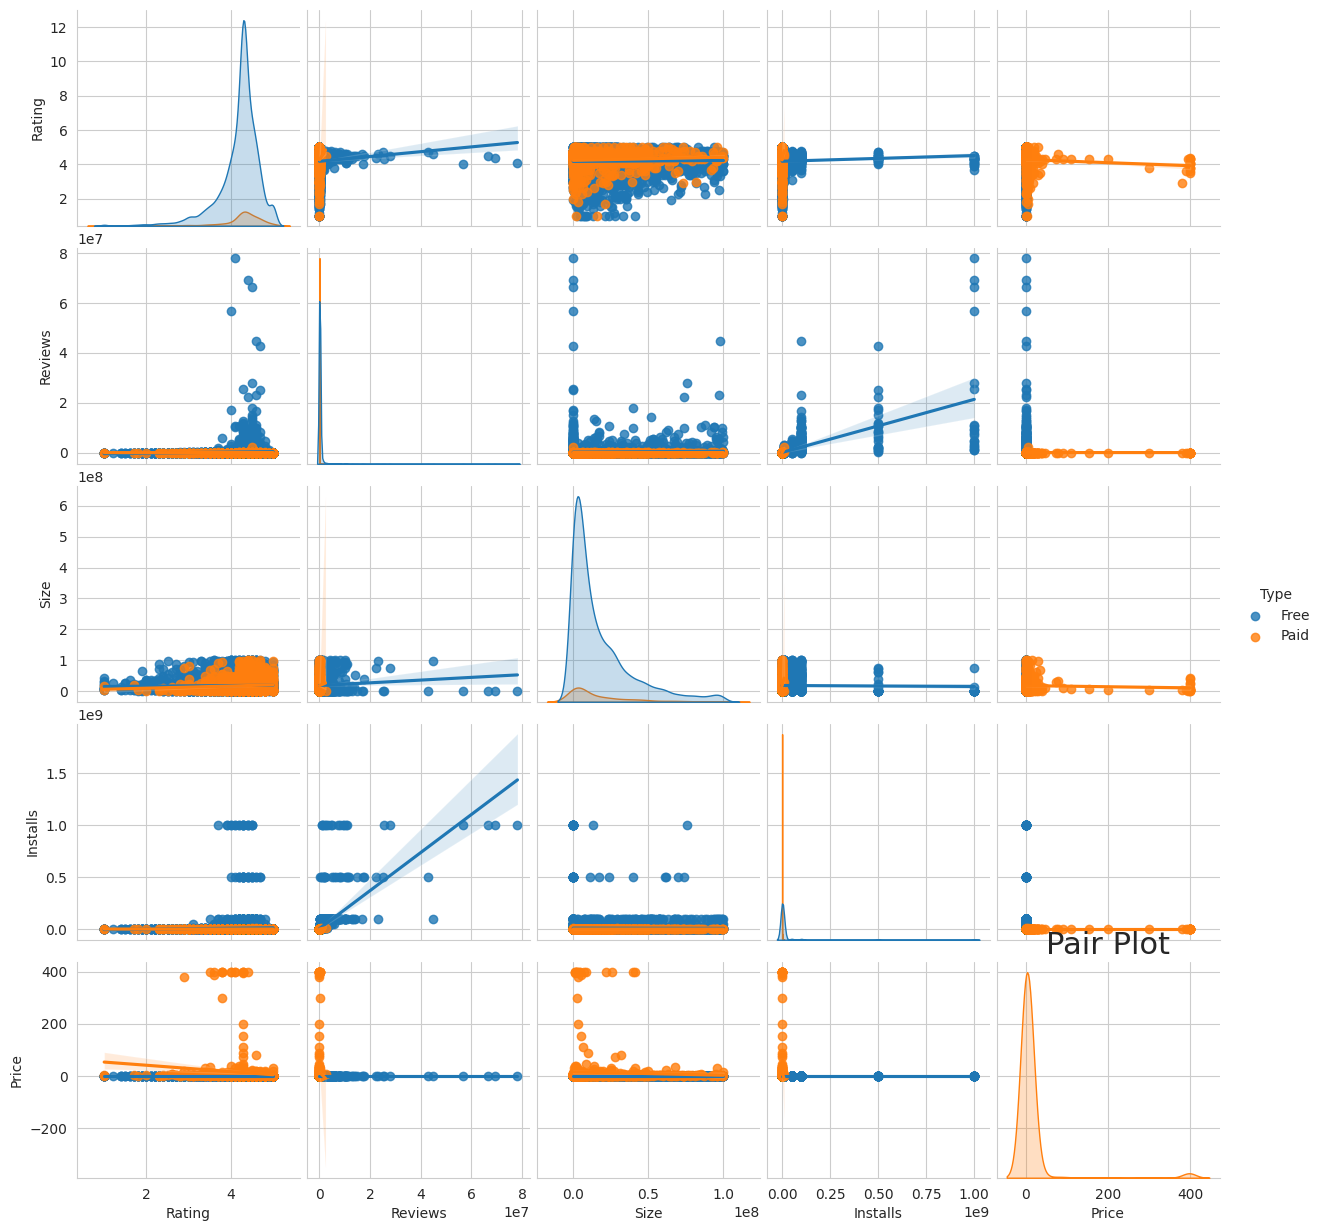

In [130]:
# Pair Plot visualization code
sns.pairplot(new_df, diag_kind="kde", kind = 'reg', hue = 'Type')

#setting labels to infer the plot
plt.title('Pair Plot',fontsize=22)
plt.show()

##### 1. Why did you pick the specific chart?

- *Pair plots are used to show relationship between various variables*

- *Pair plots can also help us explore the distribution of variables in the dataset*


##### 2. What is/are the insight(s) found from the chart?

- *There is a positive relationship between the number of reviews and the number of installs. This means that apps with more reviews tend to have more installs*

- *The number of installs doesn't grow as the price increases*

- *There is no clear relationship between the size of an app and the number of installs*

- *The diagonal plots show the distribution of each variable. These plots are useful for understanding the shape of the distribution and identifying any outliers*

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

The Google Play Store Apps report shows that the most trending apps in terms of user installs are from the categories GAME, COMMUNICATION, and TOOL. This is even though there are twice as many apps available in the FAMILY category. These apps are trending because they are either entertaining or assist the user. Developers of these apps are focusing on quality over quantity.

Apps with high ratings (above 4.0) also tend to have high review counts and user installs. The size and price of an app does not necessarily reflect its rating. Most highly reviewed apps are from the categories SOCIAL, COMMUNICATION, and GAME.

Even though apps from the GAME, SOCIAL, COMMUNICATION, and TOOL categories are trending, they are not among the top 5 most expensive apps in the store. This shows that users are more interested in free or low-cost apps.

Overall, the most trending apps in the Android market are either entertaining, assisting, or communicating apps.

Here are some important points from the text:

- The average rating of active apps on the Google Play Store is 4.17.

- Communication apps like Facebook and WhatsApp are highly reviewed, which shows that people use them regularly and provide feedback.

- Medical and Family apps are the most expensive, with some costing up to $80.
Users are more likely to download an app if it has been reviewed by a large number of people.

- More than half of users rate Family, Sports, and Health & Fitness apps positively. Games and social media apps have mixed reviews, with 50% positive and 50% negative responses.

# **Conclusion**

In this project analyzing play store applications, we explored key parameters to help our client optimize their app launch strategy:

- 92.2% of apps are free, while 7.8% are paid.
- Lowest ratings are received by Dating, Finance, and certain other categories, while the average ratings for most categories are above 4.1.
- Personalization and medical categories have a higher percentage of paid apps compared to other categories.
- The family category has the highest count of apps, approximately 1800, followed by the game category with around 950 apps.
- Games, communication, and tools have the highest number of installs.
- Most apps are rated for everyone (81.81%), followed by teens (10.74%).
- Affordable pricing, such as $1 and $2, seems to attract more paid app downloads.
- Ratings are distributed uniformly in Education, Beauty, Entertainment, Parenting, Weather, and Maps and Navigation categories.
- Ratings follow a normal distribution from 1 to 5, with a mean of 4.2 and median of 4.3.
- User reviews show that approximately 64.11% are positive, 22.10% negative, and 13.79% neutral.
- Games receive the most translated reviews, followed by the Family category.
- Social apps have the highest percentage of negative sentiments, around 50%.
- There is a positive correlation (0.63) between the number of installs and app price, indicating that more reviews lead to more installations.
- There is no significant relationship between app size and installs.
- Duplicate apps with similar names but different spelling exist, requiring data filtering and accuracy improvements.
